# Netflix Movies and TV shows Analysis

![](https://i.imgur.com/sNyFe4J.jpg)

In [66]:
# importing neccessary libraries
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import missingno as msno
from scipy.stats import norm
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Loading data

In [6]:
netflix_all = pd.read_csv("netflix_titles.csv")

### Examining Data

In [7]:
# checking the shape of the dataset
print("Shape of the dataset :", netflix_all.shape)

Shape of the dataset : (7787, 12)


There are 7787 rows and 12 coloumns in the data set

In [8]:
# checking the head of the data
netflix_all.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
netflix_all.describe(include='all').head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s4718,Movie,Fireman Sam,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [10]:
#percentage of missing values
missing_percentages = netflix_all.isna().sum().sort_values(ascending=False) / len(netflix_all)
missing_percentages

director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
rating          0.000899
show_id         0.000000
type            0.000000
title           0.000000
release_year    0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

<AxesSubplot:>

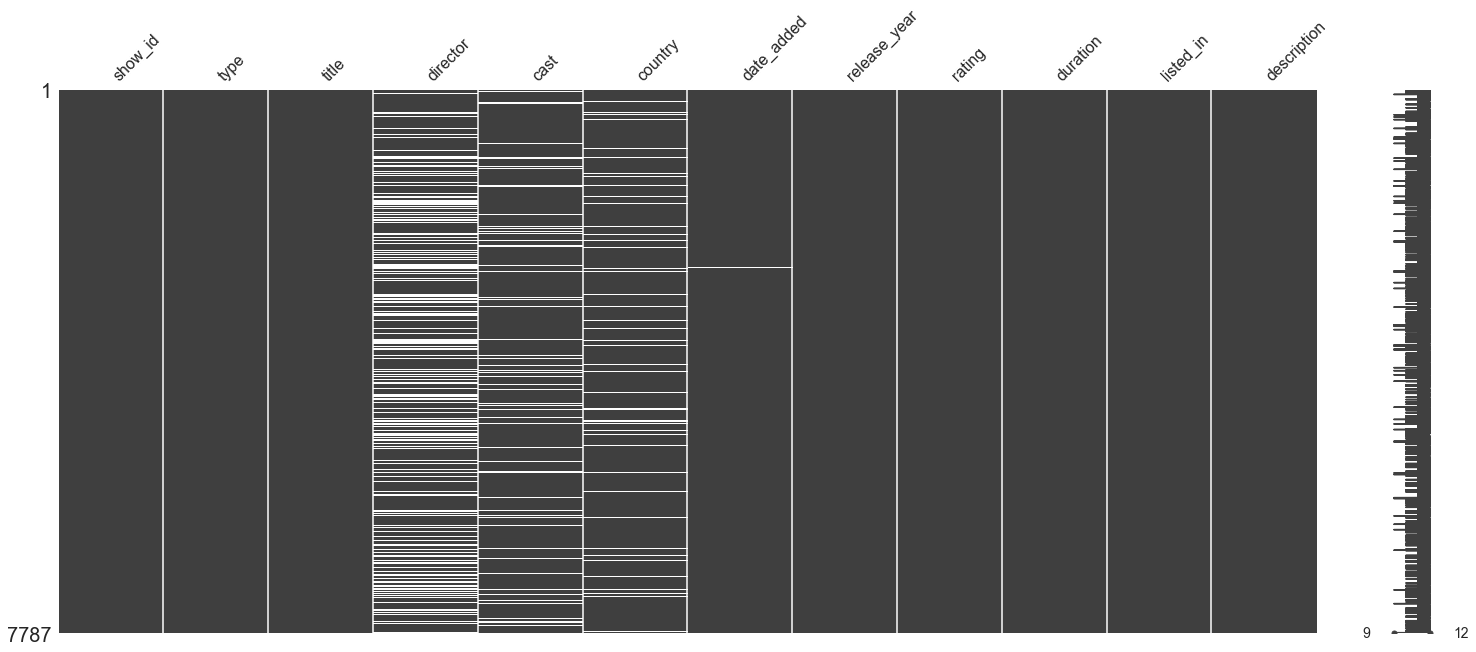

In [11]:
# visualizing missing data 
msno.matrix(netflix_all)

Both percentage and visualization show that director, cast and country have the highest number of missing values respectively.

### Cleaning Data



Lets check how many nulls are there in the data


In [12]:
# number of unique values 
netflix_all.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [13]:
# checking the sum of missing values
netflix_all.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

As shown in the visualizations, the majority of missing values are in the director column but unless we needed to assess the effect of a specific director on the earnings of a movie, this column is not very relevant in this analysis.

Cast column also has a similar situation to the director. 

the third highest missing value is in the country column and we need to fix that since it is important in our analysis.

then there is date_added and ratings which can be fixed too. 

 Fixing the missing values in Rating

In [14]:
#checking unique values in the rating column
netflix_all["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
#checking the columns with the missing rating column
netflix_all[netflix_all["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


They are not a high number and we can find the ratings on the internet

In [16]:
#ratings found from the internet
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}
# a for loop to replace all the missing values

for id , rate in rating_replacements.items():
    netflix_all.iloc[id, 8] = rate
    
#checking if the missing values have been replaced correctly
netflix_all['rating'].isna().sum()

0


Fixing "date_added" column


In [17]:
#checking the rows with missing "date_added" column
netflix_all[netflix_all['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


there are only ten rows with missing added date value so we will drop them 

In [18]:
#dropping the rows with missing value
netflix_all = netflix_all[netflix_all["date_added"].notna()]

# checking if the missing values have been dropped correctly
netflix_all['date_added'].isna().sum()

0


 Fixing "country" missing values


since there are around 500 rows with missing country value and it is an important column for our analysis we need to fill it with data

using the mod which gives the rows the most common value is logicall here

In [19]:
#filling missing value with the mod of the column
netflix_all['country'] = netflix_all['country'].fillna(netflix_all['country'].mode()[0])

#checking if it has been done right
netflix_all['country'].isna().sum()

0

Dropping the cast and director column since we are not going to use them and they have a high number of missing values

In [20]:
#dropping the two columns with high number of missing values
netflix_all = netflix_all.drop(['director', 'cast'], axis=1)
#checking if they have been dropped correctly
netflix_all.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Checking if the missing values have been dealt with completely 

In [21]:
netflix_all.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

making columns more usable

In [22]:
# splitting year and month into seperate columns 

netflix_all['year_added'] = netflix_all['date_added'].apply(lambda x: x.split(" ")[-1])


netflix_all['month_added'] = netflix_all['date_added'].apply(lambda x: x.split(" ")[0])



In [23]:
#checking the new year column
netflix_all['year_added'].head()


0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [24]:
#checking the new month column
netflix_all['month_added'].head()


0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

Checking data types of the columns

In [25]:
netflix_all.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year_added      object
month_added     object
dtype: object

In [26]:
# type should be a category
netflix_all ['type'] = pd.Categorical(netflix_all['type'])


# Year added should be integer so we can compare with `released_year`
netflix_all['year_added'] = pd.to_numeric(netflix_all['year_added'])

In [27]:
# checking data types again

netflix_all.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
year_added         int64
month_added       object
dtype: object

### Analyzing Data

#### Number of TV Shows Vs Movies

Splitting the data based on movie or tv show

In [28]:
netflix_shows =netflix_all[netflix_all['type']=='TV Show']
netflix_shows.shape

(2400, 12)

2410 rows out of 7787 rows in the data set are TV shows

In [29]:
netflix_movies =netflix_all[netflix_all['type']=='Movie']
netflix_movies.shape

(5377, 12)

5377 rows out of 7787 rows in the data set are TV shows

To show this Visually:

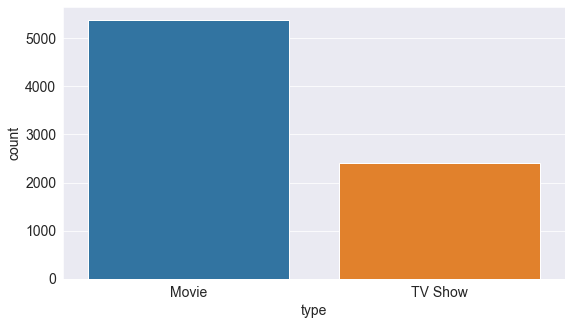

In [30]:
ax = sns.countplot(x="type", data=netflix_all)

Obviousely movies are more than twice the number of tv shows

#### Analysing the number of movies in respect to ratings

Text(0, 0.5, 'Number of Movies')

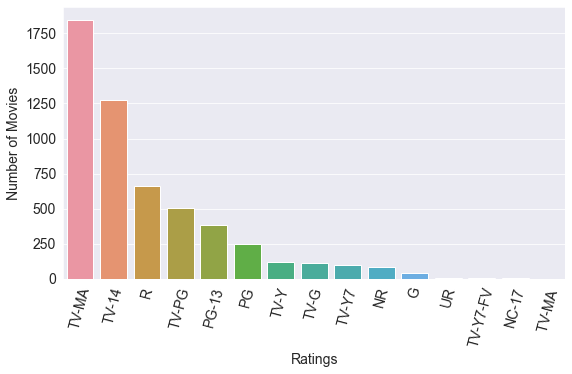

In [31]:
plt.xticks(rotation=75)
ax = sns.countplot(x="rating", data=netflix_movies, 
                   order=netflix_movies['rating'].value_counts().index[0:15])

plt.xlabel('Ratings')
plt.ylabel('Number of Movies')

The majority of the movies have a "TV-MA" rating which means they are only for mature audiances and under 17 years old should not be watching them. 

The third one is R rating which is again equivalent to the TV-MA rating.

The second one with the highest number of movies is TV-14 which is movies that are not suitable for children under 14 years old.

#### Analysing the number of TV Shows in respect to ratings

Text(0, 0.5, 'Number of TV Shows')

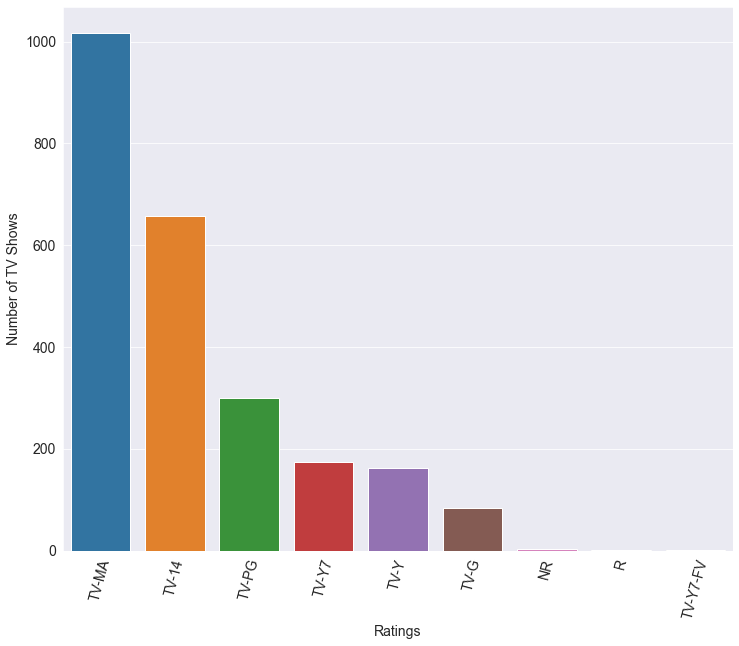

In [32]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=75)
ax = sns.countplot(x="rating", data=netflix_shows, 
                   order=netflix_shows['rating'].value_counts().index[0:15])

plt.xlabel('Ratings')
plt.ylabel('Number of TV Shows')

A very similar situation is with the number of tv shows in respect to their ratings. The majority of the shows are TV-MA ratings and then there is TV-14

#### Analysing the number of movies in respect to years released

Text(0, 0.5, 'Number of Movies')

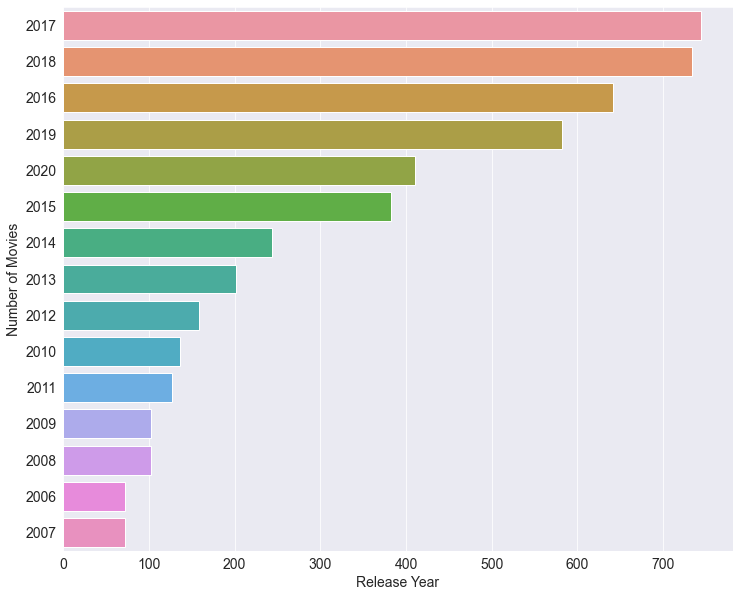

In [33]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=netflix_movies, 
                   order=netflix_movies['release_year'].value_counts().index[0:15])

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

#### Analysing the number of TV shows in respect to years released

Text(0, 0.5, 'Number of TV Shows')

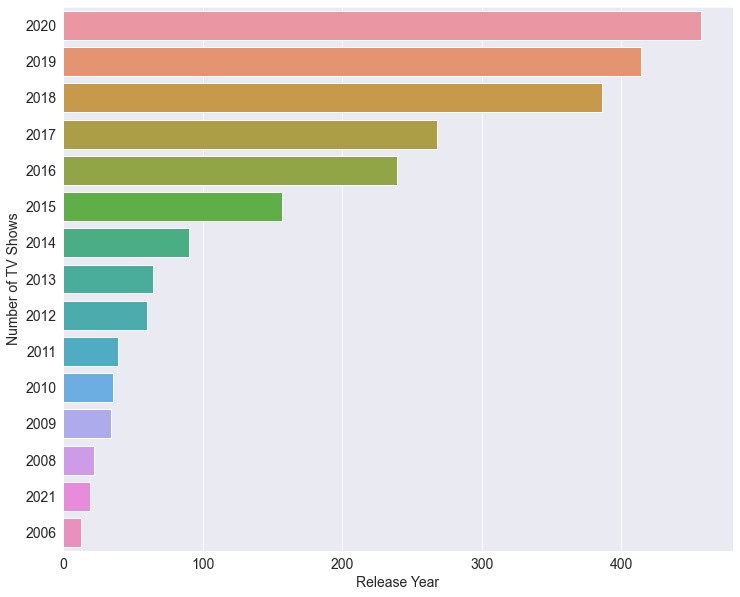

In [34]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=netflix_shows, 
                   order=netflix_shows['release_year'].value_counts().index[0:15])

plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')

#### Countries with highest number of content

first we need to preprocess the data inside the country column.

In [47]:
netflix_top_countrie = netflix_all.country.value_counts()

In [48]:
netflix_top_countrie[:15]

United States     3055
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Mexico             100
Australia           82
Taiwan              78
Brazil              72
Philippines         71
Name: country, dtype: int64

In [49]:
#united states share of top 15 countries 
netflix_top_countrie[0]/netflix_top_countrie[:15].sum()

0.5256366139022711

In [51]:
top_15 = netflix_top_countrie[:15]

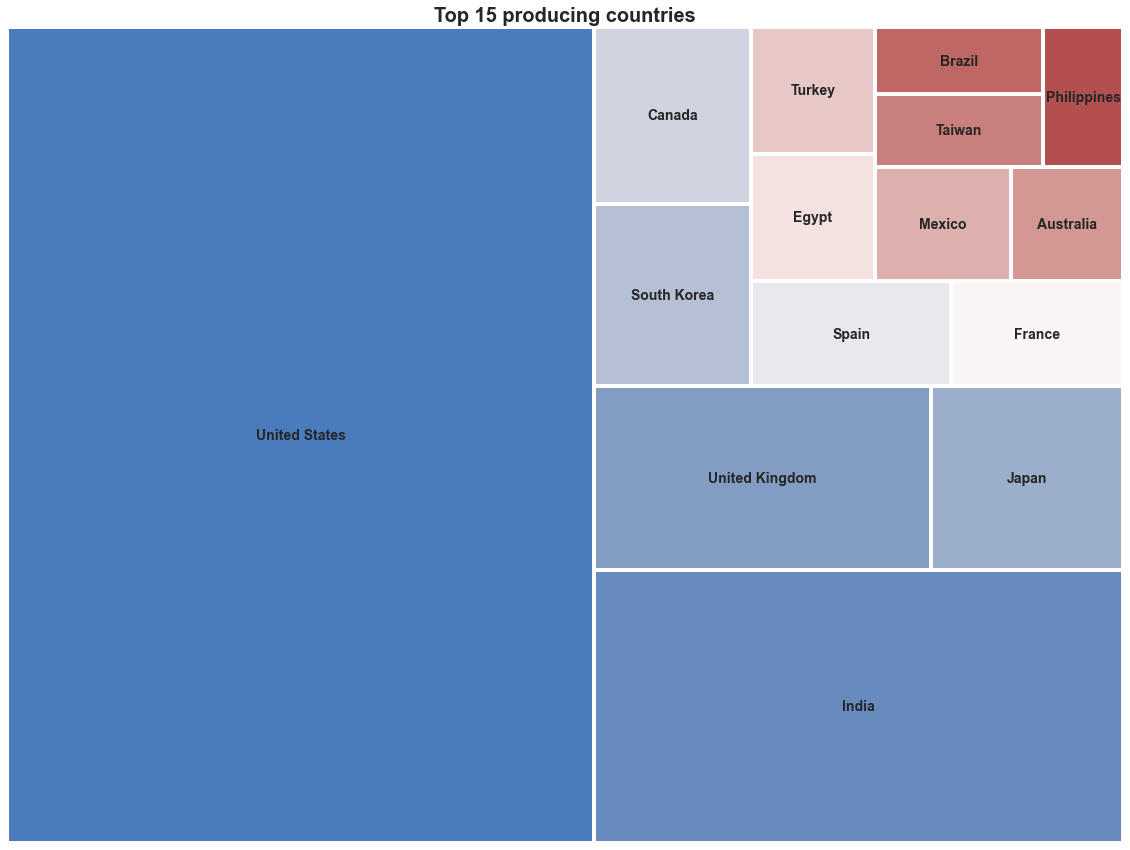

In [56]:
y = top_15
fig = plt.figure(figsize=(20, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("vlag", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 15 producing countries', 
          position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()


the United States as a content powerhouse, it creates more than 50% of the top 15.

South Korea is even above Canada which shows the huge new trend of K-cultutre spreading in the world.



#### Distribution of Movie duration


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


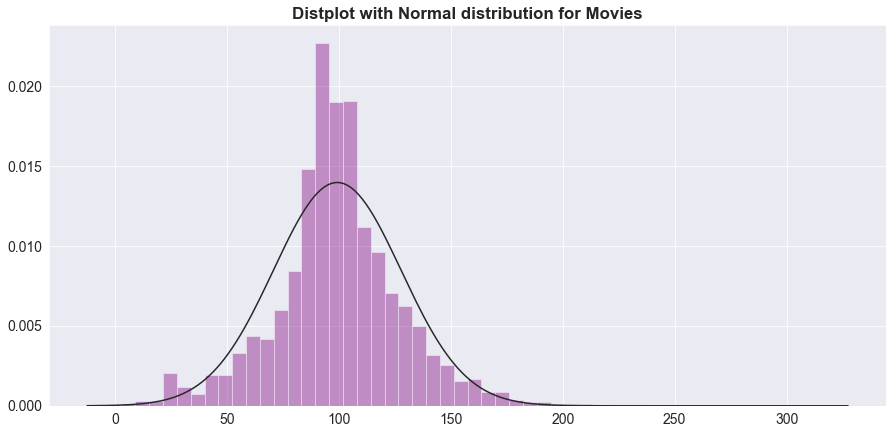

In [57]:
plt.figure(figsize=(15,7)) 
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),
             fit=norm,kde=False, color=['purple'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

the majority of the movies have a length between 85 minutes  to 120 minutues 

#### Distribution of TV shows seasons

Text(0, 0.5, 'Number of TV Shows')

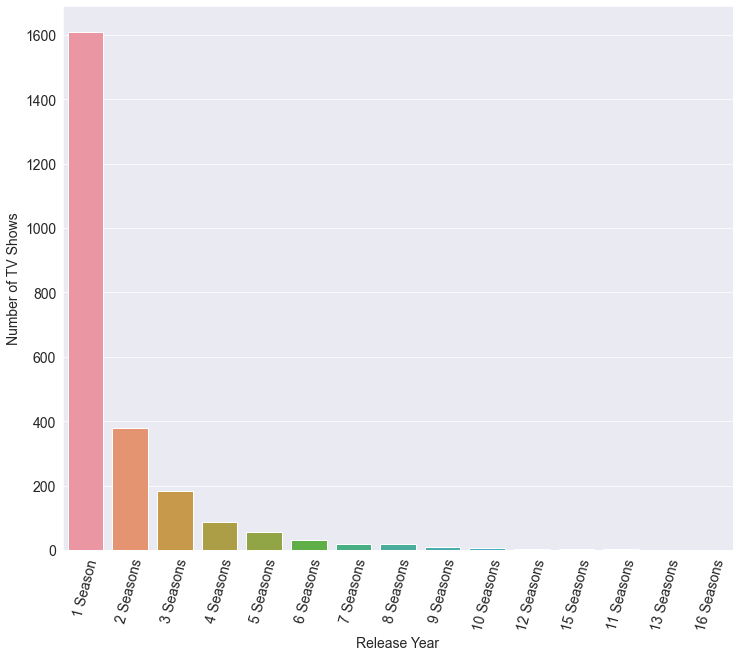

In [63]:


plt.figure(figsize=(12,10))
plt.xticks(rotation=75)

ax = sns.countplot(x ="duration", data=netflix_shows, 
                   order=netflix_shows['duration'].value_counts().index[0:15])

plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')

#### Word Cloud on Movie titles

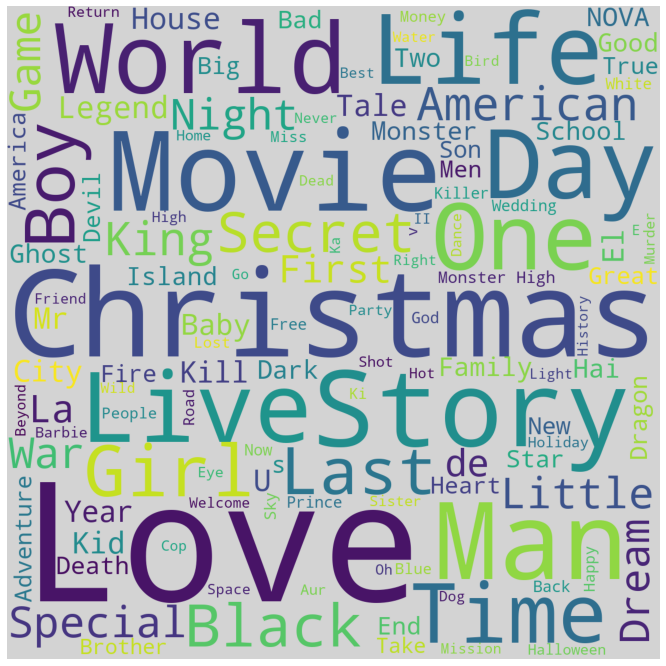

In [87]:
text = ' '.join(netflix_movies['title'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud on TV shows title

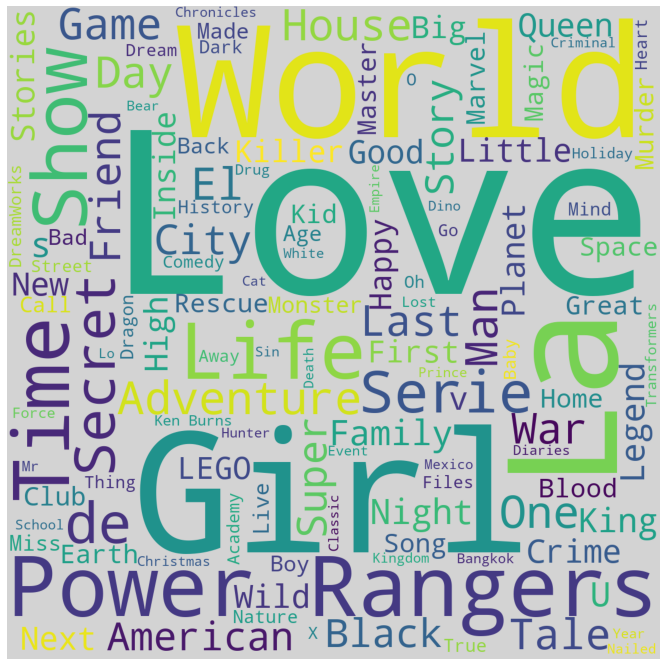

In [88]:
text = ' '.join(netflix_shows['title'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud on Movie Genre

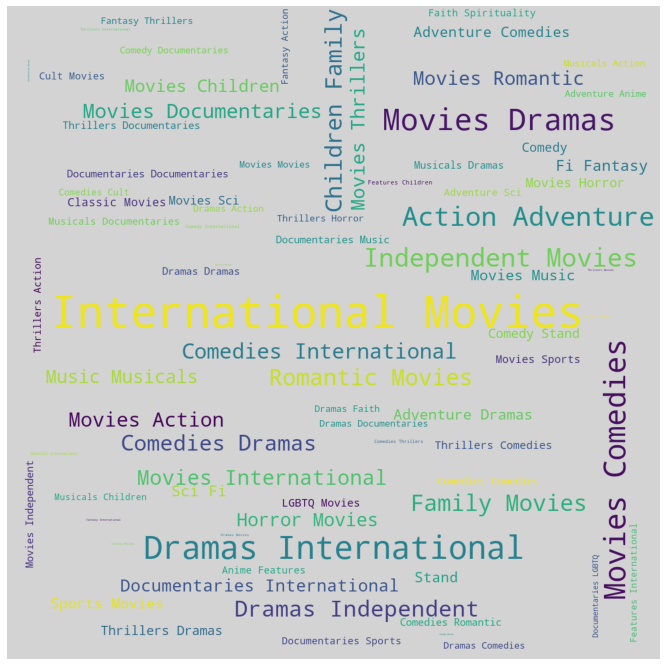

In [86]:
text = ' '.join(netflix_movies['listed_in'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud on TV Shows Genre

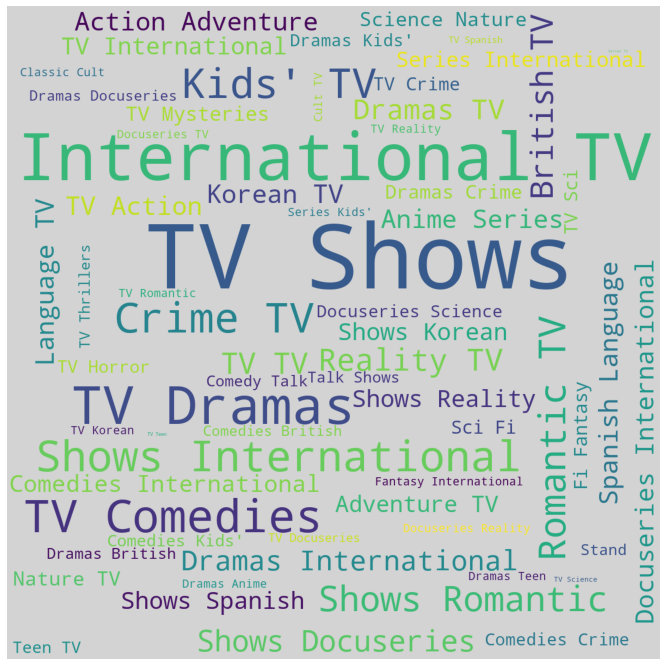

In [85]:
text = ' '.join(netflix_shows['listed_in'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud on Movies Descriptions

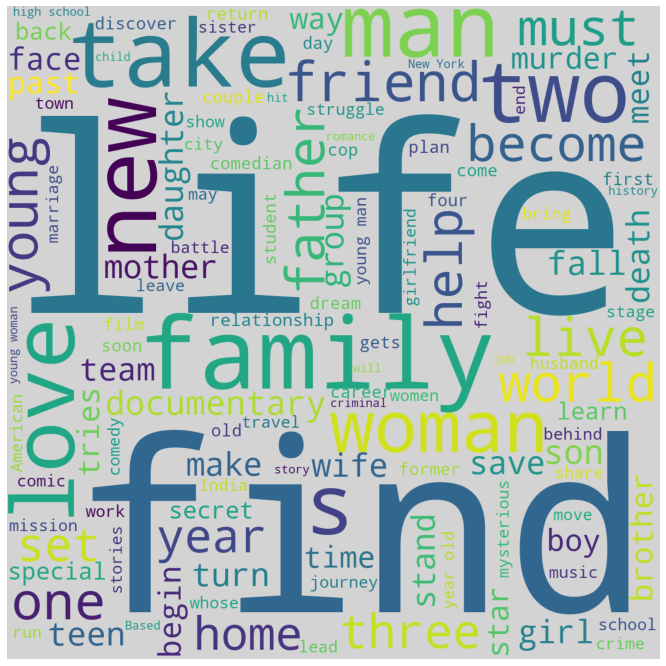

In [84]:
text = ' '.join(netflix_movies['description'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Word Cloud on TV shows Descriptions

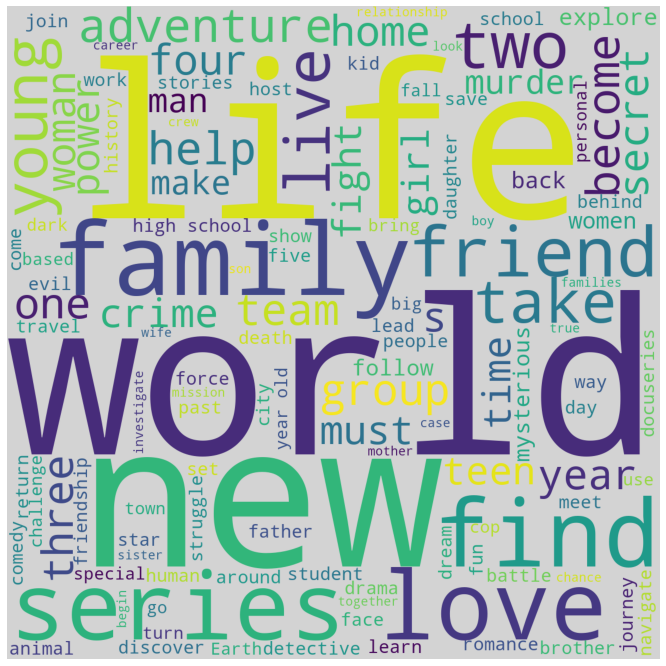

In [83]:
text = ' '.join(netflix_shows['description'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Added number  of content based on the month

In [90]:
netflix_top = netflix_all.month_added.value_counts()

In [92]:
netflix_top

December     817
October      780
January      746
November     730
March        661
September    614
August       612
April        596
July         592
June         538
May          537
February     466
              88
Name: month_added, dtype: int64

Text(0, 0.5, 'Month of Addition')

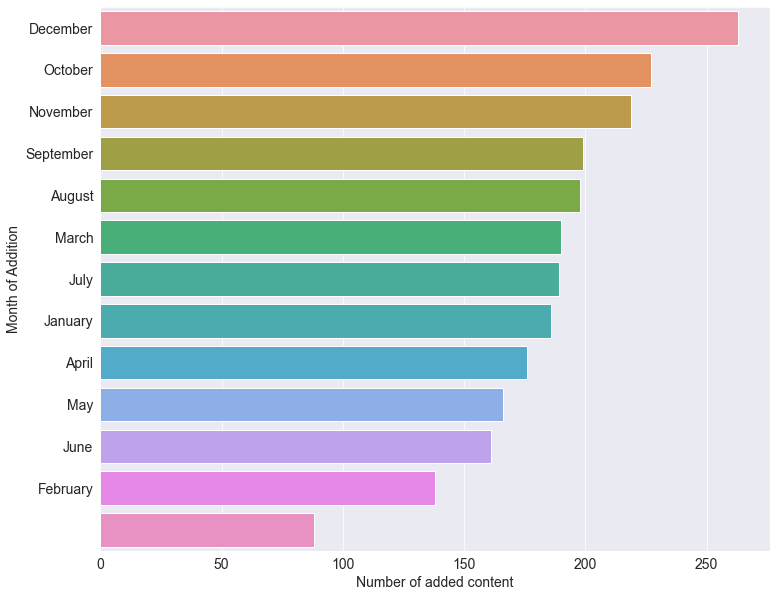

In [98]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="month_added", data=netflix_shows, 
                   order=netflix_shows['month_added'].value_counts().index[0:15])

plt.xlabel('Number of added content')
plt.ylabel('Month of Addition')

the last 4 monthes of the year seems to be the main time of content being added to Netflix